In [1]:
# not validated solutions

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import scipy

### 2.1

In [4]:
# https://gist.github.com/hayesall/25d7ab12dcacf5988f577660c50d0bed

In [5]:
A = np.array([[3, 4, 1],
            [4, 6, 2],
            [1, 2, 3]])

In [6]:
B = np.array([1,2,3])
B = B.reshape(B.shape[0],1)

In [7]:
B.T.shape

(1, 3)

In [8]:
k = 4

In [9]:
C = np.array([[4, 1, -2],
            [1, 8, -1],
            [-2, -1, 6]])

In [10]:
def matrix_chain_order(p):
    """
    Matrix-Chain-Order given a list of integers corresponding to the dimensions
    of each pair of matrices forming a chain.
    :param list p: A list of integers.
    
    >>> M, S = matrix_chain_order([2, 20, 4, 6])
    >>> print(M)
    {(1, 1): 0, (2, 2): 0, (3, 3): 0, (1, 2): 160, (2, 3): 480, (1, 3): 208}
    >>> print(S)
    {(1, 2): 1, (2, 3): 2, (1, 3): 2}
    """
    s = {}
    m = {}
    n = len(p)
    
    for i in range(1, n):
        m[tuple([i, i])] = 0
    
    for l in range(2, n):
        for i in range(1, n - l + 1):
            j = i + l - 1
            m[tuple([i, j])] = float('inf')
            for k in range(i, j):
                q = m[tuple([i, k])] + m[tuple([k + 1, j])] + (p[i-1] * p[k] * p[j])
                if q < m[tuple([i, j])]:
                    m[tuple([i, j])] = q
                    s[tuple([i, j])] = k
    return m, s



class PrintString:
    def __init__(self):
        self.st = ''

        
# for chain of length <=9
def print_optimal_parens(s, i, j, ob):
    """
    Print the optimal parentheses according to the S-matrix computed by the
    matrix_chain_order function.
    :param dict s: A dictionary of tuples corresponding to the minimum k
                   values from each step of ``matrix_chain_order``.
    :param int i: Starting index.
    :param int j: End index.
    Example (continued from previous function):
    >>> M, S = matrix_chain_order([2, 20, 4, 6])
    >>> print_optimal_parens(S, 1, 3)
    ((A_1A_2)A_3)
    General form:

    >>> chain = [2, 20, 4, 6]
    >>> M, S = matrix_chain_order(chain)
    >>> print_optimal_parens(S, 1, len(S) - 1)
    ((A_1A_2)A_3)
    """

    if i == j:
        ob.st+="{}".format(i)
    else:
        ob.st+='('
        print_optimal_parens(s, i, s[tuple([i, j])], ob)
        print_optimal_parens(s, s[tuple([i, j])] + 1, j, ob)
        ob.st+=')'
       

In [11]:
cha = [B.T, A, k, C,B]
chain = []
const=1
for it in cha:
    if type(it)==type(np.zeros(3)):
        chain.append(it)
    else:
        const*=it

In [12]:
chain

[array([[1, 2, 3]]),
 array([[3, 4, 1],
        [4, 6, 2],
        [1, 2, 3]]),
 array([[ 4,  1, -2],
        [ 1,  8, -1],
        [-2, -1,  6]]),
 array([[1],
        [2],
        [3]])]

In [13]:
const

4

In [14]:
# check:
np.dot(np.dot(np.dot(chain[0],chain[1]),chain[2]),chain[3])*const

array([[2016]])

In [15]:
chain_dim=[chain[i].shape[0] for i in range(len(chain)-1)]

In [16]:
chain_dim.append(chain[-1].shape[0])
chain_dim.append(chain[-1].shape[1])

In [17]:
chain_dim

[1, 3, 3, 3, 1]

In [18]:
ch=[chain[i].shape for i in range(len(chain))]

In [19]:
ch

[(1, 3), (3, 3), (3, 3), (3, 1)]

In [20]:
M, S = matrix_chain_order(chain_dim)

In [21]:
M, S

({(1, 1): 0,
  (2, 2): 0,
  (3, 3): 0,
  (4, 4): 0,
  (1, 2): 9,
  (2, 3): 27,
  (3, 4): 9,
  (1, 3): 18,
  (2, 4): 18,
  (1, 4): 21},
 {(1, 2): 1, (2, 3): 2, (3, 4): 3, (1, 3): 2, (2, 4): 2, (1, 4): 1})

In [22]:
A=PrintString()

In [23]:
print_optimal_parens(S, 1, len(ch),A)

In [24]:
ans=A.st

In [25]:
ans

'(1(2(34)))'

In [26]:
count=0
i=0
stack = [ans[i]]
prev = ans[i]

while stack :
    tmp = stack[-1]
    if tmp==')':
        stack.pop()
        if count == 0:
            b=chain[int(stack.pop())-1]
            count+=1
        a=chain[int(stack.pop())-1]
        b=np.dot(a,b)
        stack.pop()
    else:
        stack.append(ans[i])
    if stack[-1]==')' and stack[-2]=='(':
        break
    if i < len(ans)-1:    
        i+=1

In [27]:
b*const 

array([[2016]])

### 2.2

In [28]:
a=np.array([[3,-1],[-1,2]])
np.linalg.inv(a)

array([[0.4, 0.2],
       [0.2, 0.6]])

In [29]:
np.linalg.det(a)

5.000000000000001

In [30]:
b=np.array([[2,0,1],[0,4,0],[1,0,2]])
np.linalg.inv(b)

array([[ 0.66666667,  0.        , -0.33333333],
       [ 0.        ,  0.25      ,  0.        ],
       [-0.33333333,  0.        ,  0.66666667]])

In [31]:
np.linalg.det(b)

11.999999999999995

### 2.3

In [32]:
np.linalg.matrix_rank(np.array([[1,3,4,-1,2],[4,1,-1,0,1],[-7,1,6,-1,-1]]))

3

### 2.4

In [33]:
def mat(k):
    return np.array([[1,-1,0],
                     [-1,1+k,-1],
                     [0,-1,1]])

In [34]:
def ra():
    for k in range(100):
        if np.linalg.matrix_rank(mat(k))==2:
            return k

In [35]:
Z = scipy.linalg.null_space(mat(ra()))

In [36]:
Z

array([[0.57735027],
       [0.57735027],
       [0.57735027]])

In [37]:
Z.T.dot(Z)

array([[1.]])

### 2.5

In [38]:
u = np.array([2,3,4])
v = np.array([1,2,3])

In [39]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

#### a)

In [40]:
np.rad2deg(angle_between(u, v))

6.98249728791863

#### b)

In [41]:
def P(angle):
    return np.array([[1,0,0],
                     [0,np.cos(angle),np.sin(angle)],
                     [0,-np.sin(angle), np.cos(angle)]])

In [42]:
u2=np.dot(P(np.deg2rad(-30)), u)

In [43]:
u2

array([2.        , 0.59807621, 4.96410162])

In [44]:
v2=np.dot(P(np.deg2rad(-30)), v)

In [45]:
v2

array([1.        , 0.23205081, 3.59807621])

#### c)

In [46]:
np.rad2deg(angle_between(u2, v2))

6.982497287918682

### 2.6

#### a).

In [47]:
v = np.array([0,1,0])

In [48]:
alpha = 2/np.dot(v.T,v)

In [49]:
alpha

2.0

In [50]:
I = np.identity(3)

In [51]:
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [52]:
P=np.zeros((3,3))
for i in range(3):
    for j in range(3):
        P[i][j] = int(i==j)-alpha*v[i]*v[j]

In [53]:
a1=P.T

In [54]:
a2=np.linalg.inv(P)

In [55]:
np.all(a1==a2)

True

#### b).

In [56]:
u = np.array([0,3,0])

In [57]:
np.dot(P,u)

array([ 0., -3.,  0.])

### 2.7

#### a).

In [58]:
def P(theta):
    return np.array([[np.cos(theta), np.sin(theta)],
                     [-np.sin(theta),np.cos(theta)]])

In [59]:
tau=np.array([[10,-6],[-6,20]])

In [60]:
def tau_1(theta):
    return np.dot(np.dot(P(theta),tau),P(theta).T)

In [61]:
from scipy.optimize import fsolve

In [62]:
def func(theta):
    return (tau_1(theta)[1,0],tau_1(theta)[0,1])

In [63]:
for i in range(360):
    ans=func(i*np.pi/360)
    if abs(ans[0])<1e-1 and abs(ans[1])<1e-1:
        print(i)

50
230


In [64]:
tau_1(50*np.pi/360)

array([[ 7.18979529, -0.02650344],
       [-0.02650344, 22.81020471]])

In [65]:
tau_1(230*np.pi/360)

array([[22.81020471,  0.02650344],
       [ 0.02650344,  7.18979529]])

In [66]:
eig=np.linalg.eig(tau)

In [67]:
eig[0] # eigenvalue

array([ 7.18975032, 22.81024968])

In [68]:
eig[1] # eigenvectors

array([[-0.90558942,  0.4241554 ],
       [-0.4241554 , -0.90558942]])

#### b).

In [69]:
tau_11=np.array([[22.81024968,0],
                 [0,7.18975032]])

In [70]:
S=np.zeros((2,2))

In [71]:
for i in range(len(S)):
    for j in range(len(S[0])):
        S[i][j]=tau_11[i][j]-(tau_11[0][0]+tau_11[1][1])/2*int(i==j)

In [72]:
sigma_=0
for i in range(len(S)):
    for j in range(len(S[0])):
        sigma_+=S[i][j]*S[i][j]

In [73]:
sigma=np.sqrt(3/2*sigma_)

In [74]:
sigma

13.527749265558564

In [75]:
S=np.zeros((2,2))

In [76]:
for i in range(len(S)):
    for j in range(len(S[0])):
        S[i][j]=tau[i][j]-(tau[0][0]+tau[1][1])/2*int(i==j)

In [77]:
sigma_=0
for i in range(len(S)):
    for j in range(len(S[0])):
        sigma_+=S[i][j]*S[i][j]

In [78]:
sigma=np.sqrt(3/2*sigma_)

In [79]:
sigma

13.527749258468683

### 2.8

In [80]:
# q=[x1, x1+x2], where (x1, x2) a recoordinates of a point i.e. a vector. 

# if we subtract from q another vector e.g. [x1,x2] we must get a vector, but we would get
# [0, x1] and since [x1,x2] was any/every vector, we should have been able to get any vector 
# by subtracting this vector [x1,x2], but we only get [0,x1] which is in practicality 
# a scalar so we are not in vector space anymore, but by vector axioms we should have stayed
# in vector space when subtracting, but we did not, hence q is not a vector. 

### 2.9

In [81]:
from sympy import *

In [82]:
theta=Symbol('theta')

In [83]:
P=Matrix([[1,0,0],
          [0,cos(theta), sin(theta)],
          [0,-sin(theta),cos(theta)]])

In [84]:
P.T

Matrix([
[1,          0,           0],
[0, cos(theta), -sin(theta)],
[0, sin(theta),  cos(theta)]])

In [85]:
X_=[[0,0,0],
    [0,0,0],
    [0,0,0]]

In [86]:
x0,x1,x2= symbols('x0, x1,x2')

In [87]:
u0,u1,u2=Function('u0')(x0, x1,x2),Function('u1')(x0, x1,x2),Function('u2')(x0, x1,x2)

In [88]:
for i in range(len(X_)):
    for j in range(len(X_)):
        X_[i][j]=int(i==j)  + diff(eval('u{}'.format(i)),eval('x{}'.format(j)))

In [89]:
X = Matrix(X_)

In [90]:
X

Matrix([
[Derivative(u0(x0, x1, x2), x0) + 1,     Derivative(u0(x0, x1, x2), x1),     Derivative(u0(x0, x1, x2), x2)],
[    Derivative(u1(x0, x1, x2), x0), Derivative(u1(x0, x1, x2), x1) + 1,     Derivative(u1(x0, x1, x2), x2)],
[    Derivative(u2(x0, x1, x2), x0),     Derivative(u2(x0, x1, x2), x1), Derivative(u2(x0, x1, x2), x2) + 1]])

In [91]:
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [92]:
e=1/2*simplify(X.T@X-eye(3))

In [93]:
e

Matrix([
[                                                                                    0.5*(Derivative(u0(x0, x1, x2), x0) + 1)**2 + 0.5*Derivative(u1(x0, x1, x2), x0)**2 + 0.5*Derivative(u2(x0, x1, x2), x0)**2 - 0.5, 0.5*(Derivative(u0(x0, x1, x2), x0) + 1)*Derivative(u0(x0, x1, x2), x1) + 0.5*(Derivative(u1(x0, x1, x2), x1) + 1)*Derivative(u1(x0, x1, x2), x0) + 0.5*Derivative(u2(x0, x1, x2), x0)*Derivative(u2(x0, x1, x2), x1), 0.5*(Derivative(u0(x0, x1, x2), x0) + 1)*Derivative(u0(x0, x1, x2), x2) + 0.5*(Derivative(u2(x0, x1, x2), x2) + 1)*Derivative(u2(x0, x1, x2), x0) + 0.5*Derivative(u1(x0, x1, x2), x0)*Derivative(u1(x0, x1, x2), x2)],
[0.5*(Derivative(u0(x0, x1, x2), x0) + 1)*Derivative(u0(x0, x1, x2), x1) + 0.5*(Derivative(u1(x0, x1, x2), x1) + 1)*Derivative(u1(x0, x1, x2), x0) + 0.5*Derivative(u2(x0, x1, x2), x0)*Derivative(u2(x0, x1, x2), x1),                                                                                     0.5*(Derivative(u1(x0, x1, x2), x1) + 1)**2 

In [94]:
e.shape

(3, 3)

In [95]:
S=zeros(3,3)

In [96]:
S.shape

(3, 3)

In [97]:
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        S[i,j]=e[i,j]-(e[0,0]+e[1,1]+e[2,2])/3*int(i==j)

In [98]:
sigma_=0
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        sigma_+=S[i,j]*S[i,j]

In [99]:
sigma=sqrt(3/2*sigma_)

In [100]:
# For example:
sigma.subs({u0:x0+x1+x2,
            u1:x0*x1*x2, 
            u2:x1*x2+x2*x0+x0*x1}).simplify().subs({x0:0.23,x1:1.56,x2:0.78})

10.5075934583603

In [101]:
ans=simplify(P@e@P.T)

In [102]:
ans

Matrix([
[                                                                                                                                                                                                                                                                                                                       0.5*(Derivative(u0(x0, x1, x2), x0) + 1)**2 + 0.5*Derivative(u1(x0, x1, x2), x0)**2 + 0.5*Derivative(u2(x0, x1, x2), x0)**2 - 0.5,                                                                                                                                                                                                                                                                                                  0.5*((Derivative(u0(x0, x1, x2), x0) + 1)*Derivative(u0(x0, x1, x2), x1) + (Derivative(u1(x0, x1, x2), x1) + 1)*Derivative(u1(x0, x1, x2), x0) + Derivative(u2(x0, x1, x2), x0)*Derivative(u2(x0, x1, x2), x1))*cos(theta) + 0.5*((Derivative(u0(x0, x1, x2), x0) +

In [103]:
ans.shape

(3, 3)

In [104]:
# see Definition 2.60

In [105]:
S=zeros(3,3)

In [106]:
S.shape

(3, 3)

In [107]:
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        S[i,j]=ans[i,j]-(ans[0,0]+ans[1,1]+ans[2,2])/3*int(i==j)

In [108]:
sigma_=0
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        sigma_+=S[i,j]*S[i,j]

In [109]:
sigma1 = sqrt(3/2*sigma_)

In [110]:
simplify(sigma1).subs({u0:x0+x1+x2,
                        u1:x0*x1*x2, 
                        u2:x1*x2+x2*x0+x0*x1}).simplify().subs({x0:0.23,x1:1.56,x2:0.78})

10.5075934583603*sqrt(1.21593375634644e-18*sin(4*theta) + 1)

In [111]:
# or in general for finite space domain and finite displacements
(sigma**2-sigma1**2).simplify() # ~ 0

-1.11022302462516e-16*sin(4*theta)*Derivative(u1(x0, x1, x2), x1)**2*Derivative(u1(x0, x1, x2), x2) + 1.11022302462516e-16*sin(4*theta)*Derivative(u2(x0, x1, x2), x1)*Derivative(u2(x0, x1, x2), x2)**2 + 6.16297582203915e-33*Derivative(u0(x0, x1, x2), x0) + 6.16297582203915e-33*Derivative(u1(x0, x1, x2), x1) + 6.16297582203915e-33*Derivative(u2(x0, x1, x2), x2) + 1.54074395550979e-33

### 2.10

#### a).

In [112]:
E,v = 2.1e9, 0.3

In [113]:
lambda_ = (E*v)/((1+v)*(1-2*v))

In [114]:
lambda_

1211538461.5384614

In [115]:
mu_ = E/(2*(1+v))

In [116]:
mu_

807692307.6923077

In [117]:
C=np.zeros((3,3,3,3))

In [118]:
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                C[i][j][r][s]=lambda_*int(i==j)*int(r==s)+mu_*(int(i==r)*int(j==s)+int(i==s)*int(j==r))

In [119]:
S=np.zeros((3,3,3,3))

In [120]:
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                S[i][j][r][s]=C[i][j][r][s]-(C[0][0][0][0]+C[1][1][1][1]+C[2][2][2][2])/3*int(i==j==r==s)

In [121]:
sigma_=0
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                sigma_+=S[i,j,r,s]*S[i,j,r,s]

In [122]:
sigma=np.sqrt(3/2*sigma_)

In [123]:
sigma

4995301046.421395

In [124]:
theta=30.1*np.pi/360

In [125]:
P=np.array([[1,0,0],
          [0,np.cos(theta), np.sin(theta)],
          [0,-np.sin(theta),np.cos(theta)]])

In [126]:
C1=np.zeros((3,3,3,3))

In [127]:
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                tmp=0
                for m in range(3):
                    for n in range(3):
                        for k in range(3):
                            for l in range(3):
                                tmp += P[i][m]*P[j][n]*P[r][k]*P[s][l]*C[m][n][k][l]
                C1[i][j][r][s] = tmp               

In [128]:
S1=np.zeros((3,3,3,3))

In [129]:
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                S1[i][j][r][s]=C1[i][j][r][s]-(C1[0][0][0][0]+C1[1][1][1][1]+C1[2][2][2][2])/3*int(i==j==r==s)

In [130]:
sigma_=0
for i in range(3):
    for j in range(3):
        for r in range(3):
            for s in range(3):
                sigma_ += S1[i,j,r,s]*S1[i,j,r,s]

In [131]:
sigma1=np.sqrt(3/2*sigma_)

In [132]:
sigma1

4995301046.421395

#### b).

Check e.g.: https://serc.carleton.edu/NAGTWorkshops/mineralogy/mineral_physics/tensors.html

#### c).

In [133]:
D=E/(1-v**2)*np.array([[1,v,0],
                       [v,1,0],
                       [0,0,(1-v)/2]])

In [134]:
D

array([[2.30769231e+09, 6.92307692e+08, 0.00000000e+00],
       [6.92307692e+08, 2.30769231e+09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.07692308e+08]])

In [135]:
eig=np.linalg.eig(D)
D1_v=eig[0]

In [136]:
D1=np.diag(D1_v)

In [137]:
D1

array([[3.00000000e+09, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.61538462e+09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.07692308e+08]])

In [138]:
eig[1]@D1@np.linalg.inv(eig[1])

array([[2.30769231e+09, 6.92307692e+08, 0.00000000e+00],
       [6.92307692e+08, 2.30769231e+09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.07692308e+08]])

In [139]:
eig[1]@D1@eig[1].T

array([[2.30769231e+09, 6.92307692e+08, 0.00000000e+00],
       [6.92307692e+08, 2.30769231e+09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.07692308e+08]])

In [140]:
np.linalg.inv(eig[1])@D@np.linalg.inv(eig[1].T)

array([[3.00000000e+09, 8.84847506e-08, 0.00000000e+00],
       [1.46020094e-07, 1.61538462e+09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.07692308e+08]])

In [141]:
T = np.linalg.inv(eig[1])

In [142]:
T

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

### 2.11

In [143]:
# by multiplying both sides of 2.70 by g_j, we would get definition 2.67

### 2.12

#### a).

In [144]:
g1=np.array([1,0])

In [145]:
g2=np.array([1/np.sqrt(2),1/np.sqrt(2)])

In [146]:
R = 3*g1+4*g2

In [147]:
u = -2*g1+3*g2

In [148]:
R@u

6.707106781186545

#### b).

In [149]:
a=np.array([[g1@g1,g1@g2],
            [g2@g1,g2@g2]])

In [150]:
inv_a=np.linalg.pinv(a)

In [151]:
g1_cont=inv_a@g1
g2_cont=inv_a@g2

In [152]:
u_cont=-2*(a@g1_cont)+3*(a@g2_cont)

In [153]:
R@u

6.707106781186545

In [154]:
R@u_cont

6.7071067811865595

### 2.13

In [155]:
g=np.array([[g1@g1,g1@g2],
            [g2@g1,g2@g2]])

In [156]:
np.linalg.det(g)

0.4999999999999999

In [157]:
inv_g=np.linalg.inv(g)

In [158]:
inv_g

array([[ 2.        , -1.41421356],
       [-1.41421356,  2.        ]])

In [159]:
g1_cont=inv_g@g1
g2_cont=inv_g@g2

In [160]:
g1_cont

array([ 2.        , -1.41421356])

In [161]:
g2_cont

array([0.41421356, 0.41421356])

In [162]:
stress=np.array([[100,10],[10,200]])
strain=np.array([[0.01,0.05],[0.05,0.02]])

In [163]:
stress_cont=np.zeros((2,2))
e=np.array([[1,0],[0,1]])
g_cont=np.array([g1_cont,g2_cont])

In [164]:
for i in range(2):
    for j in range(2):
        tmp=0
        for n in range(2):
            for m in range(2):
                tmp+=stress[i][j]*e[i][j]*g_cont[n][m]
        stress_cont[i][j]=tmp

In [165]:
stress_cont

array([[141.42135624,   0.        ],
       [  0.        , 282.84271247]])

In [166]:
stress_cont@strain*(e[0]@g1)*(e[1]@g2)

array([[ 1.,  5.],
       [10.,  4.]])

In [167]:
stress@strain

array([[ 1.5,  5.2],
       [10.1,  4.5]])

### 2.14

In [168]:
theta, gamma = np.random.rand(), np.random.rand()

In [169]:
A = np.matrix([[1,0,0],
          [0,np.cos(theta), np.sin(theta)],
          [0,-np.sin(theta),np.cos(theta)]])

In [170]:
B = np.matrix([[1,0,0],
          [0,np.cos(gamma), np.sin(gamma)],
          [0,-np.sin(gamma),np.cos(gamma)]])

In [171]:
a_ = np.random.rand(3, 3)

In [172]:
a_symm = (a_ + a_.T)/2

In [173]:
np.all(a_symm == a_symm.T)

True

In [174]:
b_ = np.random.rand(3, 3)

In [175]:
b_symm = (b_ + b_.T)/2

In [176]:
a = np.linalg.inv(A)@a_symm

In [177]:
b = np.linalg.inv(B)@b_symm

In [178]:
a@(A@b@B.T) - (A.T@a@B)@b

matrix([[-0.04076855,  0.25740684, -0.5848545 ],
        [ 0.55154924,  1.07071848,  0.80980825],
        [ 0.58439336,  0.841639  , -1.02952304]])

In [179]:
a = A@a_

In [180]:
b = B@b_

In [181]:
a@(A@b@B.T) - (A.T@a@B)@b

matrix([[-0.01900682, -0.04002163,  0.06171869],
        [ 0.42947175,  0.96604246,  0.0749266 ],
        [ 0.20733306,  0.04819401, -0.96362335]])

In [182]:
# TODO - the answer is not the same as expected in the book 

### 2.15

In [183]:
A = np.array([[2,-1],[-1,1]])

#### a).

In [184]:
L_, V = np.linalg.eig(A)

In [185]:
L=np.diag(L_)

In [186]:
V@L@V.T

array([[ 2., -1.],
       [-1.,  1.]])

#### b).

In [187]:
A3=A@A@A

In [188]:
A6=A3@A3

In [189]:
A6

array([[ 233, -144],
       [-144,   89]])

In [190]:
A6_=V@(L**6)@V.T

In [191]:
A6_

array([[ 233., -144.],
       [-144.,   89.]])

In [192]:
A_inv=np.linalg.inv(A)

In [193]:
A_inv

array([[1., 1.],
       [1., 2.]])

In [194]:
A_inv_=V@np.diag([1/x for x in L_])@V.T

In [195]:
A_inv_

array([[1., 1.],
       [1., 2.]])

In [196]:
A_inv@A_inv

array([[2., 3.],
       [3., 5.]])

In [197]:
V@np.diag([1/x**2 for x in L_])@V.T

array([[2., 3.],
       [3., 5.]])

### 2.16

In [198]:
A=np.array([[2,1,0],[1,3,1],[0,1,2]])

In [199]:
v1=np.array([1/np.sqrt(3), -1/np.sqrt(3), 1/np.sqrt(3)])

In [200]:
v=v1+0.1*np.array([1,1,0])

In [201]:
v=v.reshape(3,1)

In [202]:
rho=v.T@A@v/(v.T@v)

In [203]:
rho

array([[1.04901961]])

In [204]:
lambda1 = 1

In [205]:
scipy.linalg.norm(v, np.inf)-scipy.linalg.norm(v1, np.inf)

0.09999999999999998

In [206]:
rho-lambda1

array([[0.04901961]])

### 2.17

In [207]:
A=np.array([[2,-1,0],[-1,4,-1],[0,-1,8]])

In [208]:
L,_=np.linalg.eig(A)

In [209]:
L

array([1.5619306 , 4.19325243, 8.24481697])

In [210]:
p = lambda x: np.linalg.det(A-x*np.identity(3))

In [211]:
p(1)

13.0

In [212]:
xpoints = np.array([i*0.1 for i in range(-50,150)])
ypoints = np.array([p(i*0.1) for i in range(-50,150)])

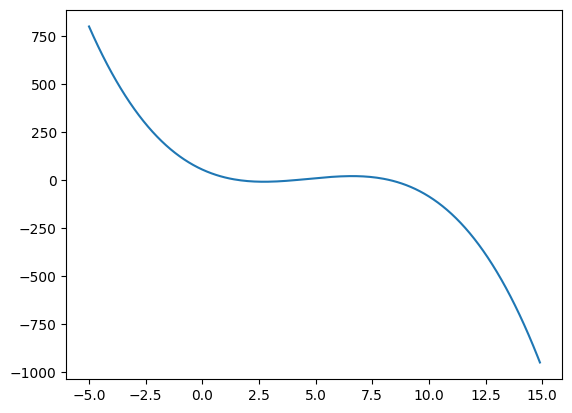

In [213]:
plt.plot(xpoints, ypoints)
plt.show()

In [214]:
A1=np.delete(A, -1, axis=0)

In [215]:
A1

array([[ 2, -1,  0],
       [-1,  4, -1]])

In [216]:
A1=np.delete(A1, -1, axis=1)

In [217]:
A1

array([[ 2, -1],
       [-1,  4]])

In [218]:
L1,_=np.linalg.eig(A1)

In [219]:
L1

array([1.58578644, 4.41421356])

In [220]:
p1=lambda x: np.linalg.det(A1-x*np.identity(2))

In [221]:
p1(1)

2.0

In [222]:
xpoints = np.array([i*0.1 for i in range(-50,150)])
ypoints = np.array([p1(i*0.1 ) for i in range(-50,150)])

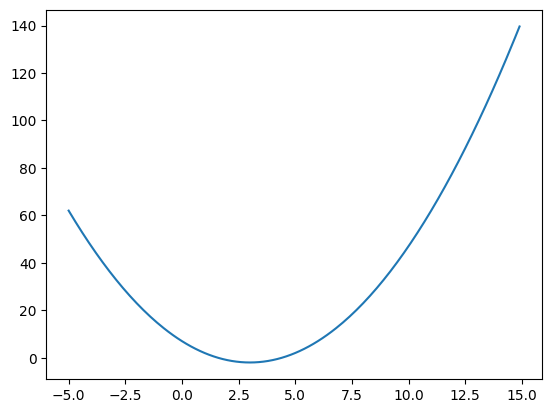

In [223]:
plt.plot(xpoints, ypoints)
plt.show()

In [224]:
A2=np.delete(A1, -1, axis=0)

In [225]:
A2

array([[ 2, -1]])

In [226]:
A2=np.delete(A2, -1, axis=1)

In [227]:
A2

array([[2]])

In [228]:
L2,_=np.linalg.eig(A2)

In [229]:
L2

array([2.])

In [230]:
p2=lambda x: np.linalg.det(A2-x*np.identity(1))

In [231]:
p2(1)

1.0

In [232]:
xpoints = np.array([i*0.1 for i in range(-50,150)])
ypoints = np.array([p2(i*0.1 ) for i in range(-50,150)])

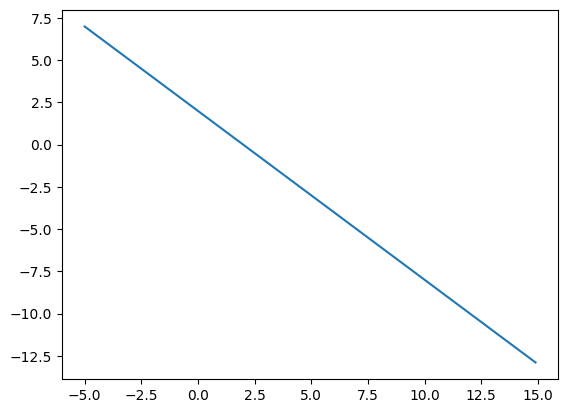

In [233]:
plt.plot(xpoints, ypoints)
plt.show()

### 2.18

In [234]:
# in general by eq. 2.153

In [235]:
v=np.array([1,4,-3])

In [236]:
v_norm1=scipy.linalg.norm(v, 1)

In [237]:
v_norm1

8.0

In [238]:
v_norm2=scipy.linalg.norm(v, 2)

In [239]:
v_norm2

5.0990195135927845

In [240]:
c1=1
c2=len(v)

In [241]:
v_norm2*c1<=v_norm1<=v_norm2*c2

True

### 2.19

In [242]:
# the same as EXAMPLE 2.41, but with definition 2.159 

### 2.20

In [243]:
# similar to EXAMPLE 2.42, but with appropriate definitions for v_norm1 and A_norm1

### 2.21

In [244]:
# rho(A) = max_i|lambda_i| as per EXAMPLE 2.34 and 2.166

In [245]:
# A_norm2 = max_i|lambda_i| for symmetric matrix, as indicated on p. 68

### 2.22

In [246]:
# for example by substituting 2.176 to 2.170, for symmetric matrix, gives 2.177